# Class 5: Model Evaluation 2 -- Evaluation metrics

# 1) Confusion Matrix

## Loading the Breast Cancer Wisconsin dataset

The Breast Cancer Wisconsin dataset is a classic benchmark dataset for binary classification. It contains 569 samples, each one with 30 real-valued features, all computed from digitised images of fine needle aspirates of breast masses. The target classes are:

0 = malignant (cancerous)

1 = benign (non-cancerous)

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# import the dataset from sklearn
breast_cancer = load_breast_cancer()

# create a variable "data" which contains the dataframe from the dataset
data = pd.DataFrame(data=breast_cancer['data'], columns=breast_cancer['feature_names'])
data['target'] = pd.Series(breast_cancer['target'], dtype='category')

# Sample 10 cases (5 from each class)
sample_0 = data[data['target'] == 0].sample(5, random_state=42)
sample_1 = data[data['target'] == 1].sample(5, random_state=42)
sampled_cases = pd.concat([sample_0, sample_1])

print("10 sampled cases (5 with target=0 and 5 with target=1):")
print(sampled_cases)

10 sampled cases (5 with target=0 and 5 with target=1):
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
33        19.270         26.47          127.90     1162.0          0.09401   
400       17.910         21.02          124.40      994.0          0.12300   
274       17.930         24.48          115.20      998.9          0.08855   
129       19.790         25.12          130.40     1192.0          0.10150   
87        19.020         24.59          122.00     1076.0          0.09029   
395       14.060         17.18           89.75      609.1          0.08045   
110        9.777         16.99           62.50      290.2          0.10370   
481       13.900         19.24           88.73      602.9          0.07991   
493       12.460         12.83           78.83      477.3          0.07372   
136       11.710         16.67           74.72      423.6          0.10510   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
33      

- Next, we split the data into 80% training data and 20% test data, using a stratified split

In [47]:
from sklearn.model_selection import train_test_split

# Split data into training and testing
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

We will use two classifiers throughout this notebook: logistic regression and KNN.

## 1) Confusion Matrix

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

from mlxtend.evaluate import confusion_matrix
# or:
# from sklearn.metrics import confusion_matrix

# Build pipeline with Logistic Regression instead of KNN
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(max_iter=5000))

# Fit model
pipe_lr.fit(X_train, y_train)

# Predict on test set
y_pred = pipe_lr.predict(X_test)

# Compute confusion matrix
confmat = confusion_matrix(y_test, y_pred)

print(confmat)


[[41  1]
 [ 0 72]]


In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline


from mlxtend.evaluate import confusion_matrix
#or
#from sklearn.metrics import confusion_matrix


pipe_knn = make_pipeline(StandardScaler(),
                         KNeighborsClassifier(n_neighbors=3))

pipe_knn.fit(X_train, y_train)

y_pred = pipe_knn.predict(X_test)

confmat = confusion_matrix(y_test, y_pred)

print(confmat)

[[40  2]
 [ 1 71]]


Any differences between the confusion matrices of the two classifiers? Compare them.

### Multiclass to Binary

In [4]:
# We use random data

# ground truth
y_target =    [1, 1, 1, 0, 0, 2, 0, 3]
# predicted classes
y_predicted = [1, 0, 1, 0, 0, 2, 1, 3]

cm1 = confusion_matrix(y_target=y_target, 
                       y_predicted=y_predicted)
print(cm1)

[[2 1 0 0]
 [1 2 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [5]:
cm2 = confusion_matrix(y_target=y_target, 
                       y_predicted=y_predicted,
                       binary=True)
print(cm2)

[[4 1]
 [1 2]]


### Visualising a Confusion Matrix

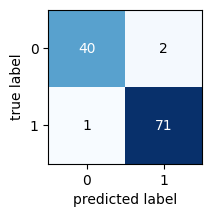

In [53]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plot_confusion_matrix(conf_mat=confmat, figsize=(2, 2))
plt.show()

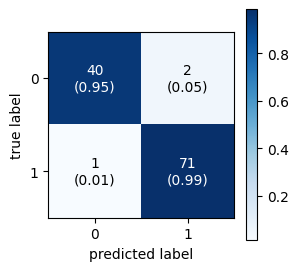

In [54]:
# Relative values are shown for each cell
fig, ax = plot_confusion_matrix(conf_mat=confmat,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                figsize=(3, 3))
plt.show()

# Balanced Accuracy

We use the mlxtend library because it provides an extension to accuracy_score, with respect to sklearn, to compute the binarised accuracy.

In [57]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.evaluate import accuracy_score
import numpy as np

In [58]:
y_targ = np.array(3*[0] + 69*[1] + 18*[2])
y_pred = np.array(10*[0] + 50*[1] + 30*[2])

In [59]:
# standard accuracy computation
std_acc = accuracy_score(y_targ, y_pred)

# binarised accuracy per class (pos_label)
bin_acc0 = accuracy_score(y_targ, y_pred, method='binary', pos_label=0)
bin_acc1 = accuracy_score(y_targ, y_pred, method='binary', pos_label=1)
bin_acc2 = accuracy_score(y_targ, y_pred, method='binary', pos_label=2)

avg_acc = accuracy_score(y_targ, y_pred, method='average')

print(f'Standard accuracy: {std_acc*100:.2f}%')
print(f'Class 0 accuracy: {bin_acc0*100:.2f}%')
print(f'Class 1 accuracy: {bin_acc1*100:.2f}%')
print(f'Class 2 accuracy: {bin_acc2*100:.2f}%')
print(f'Average per-class accuracy: {avg_acc*100:.2f}%')

Standard accuracy: 78.89%
Class 0 accuracy: 92.22%
Class 1 accuracy: 78.89%
Class 2 accuracy: 86.67%
Average per-class accuracy: 85.93%


# 2) Precision, Recall, F1 Score

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from mlxtend.evaluate import confusion_matrix
#from sklearn.metrics import confusion_matrix

pipe_knn = make_pipeline(StandardScaler(),
                         KNeighborsClassifier(n_neighbors=2))

pipe_knn.fit(X_train, y_train)

y_pred = pipe_knn.predict(X_test)

confmat = confusion_matrix(y_test, y_pred)

print(confmat)

[[40  2]
 [ 2 70]]


In [12]:
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score


print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Accuracy: 0.965
Precision: 0.972
Recall: 0.972
F1: 0.972


## 3) Using Metrics in GridSearch

Let's do hyperparameter tuning for logistic regression and KNN using grid search. However, instead of using accuracy as our metric to optimise, we are going to use the F1 metric.

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Define parameter range for Logistic Regression (C = inverse of regularization strength)
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

# Build pipeline with Logistic Regression
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(max_iter=5000))

# Define parameter grid for Logistic Regression
param_grid = [{'logisticregression__C': param_range}]

# GridSearchCV setup
gs = GridSearchCV(estimator=pipe_lr,
                  param_grid=param_grid,
                  scoring='f1',
                  cv=10,
                  n_jobs=-1)

# Fit model and print results
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9794052754837914
{'logisticregression__C': 1.0}


In [33]:
from sklearn.model_selection import GridSearchCV


param_range = [3, 5, 7, 9, 15, 21, 31]

pipe_knn = make_pipeline(StandardScaler(),
                         KNeighborsClassifier())

param_grid = [{'kneighborsclassifier__n_neighbors': param_range}]


gs = GridSearchCV(estimator=pipe_knn,
                  param_grid=param_grid,
                  scoring='f1',
                  cv=10,
                  n_jobs=-1)


gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9791801171543705
{'kneighborsclassifier__n_neighbors': 7}


<p style="margin-bottom:1cm;"></p>

### EXERCISE

**Considering the F1 metric, which algorithm would you choose for the Wisconsin cancer dataset: logistic regression or K-nearest neighbour?**



### Multi-class case

Now, let's consider the Iris dataset, which is non-binary; it has three classes.

So far, we have used logistic regression for binary classification. However, we can also use logistic regression for multiclass classification, as needed by, for instance, the Iris dataset. 
Logistic regression has a built-in multiclass generalisation, and scikit-learn enables it by default. 

Logistic regression supports multiclass classification via two standard strategies:

1. **Multinomial (softmax) logistic regression** learns one weight vector per class and models  
   $$
   P(y=c\mid x)=\frac{\exp\!\big(w_c^\top x + b_c\big)}{\sum_{k=1}^{K}\exp\!\big(w_k^\top x + b_k\big)}.
   $$
   Trained by maximising the multinomial log-likelihood (typically with L2 regularisation).
   Notice that:
    - **$K$** : total number of classes.  *Example (Iris): \(K=3\) (setosa, versicolor, virginica).*
    - **$c$** : the specific class whose probability we’re computing (one of $1,2,\dots,K$).
    - **$k$** : a dummy index used in the denominator to sum over **all** classes $1,\dots,K$ (for normalisation).
    - **$x$** : feature vector for a single sample (e.g., the four Iris measurements).
    - **$w_c, b_c$** : parameters (weights and bias (intercept)) **for class c**. Each class has its own $(w_c, b_c)$.
    - **Intuition:**
        - Numerator $\exp(w_c^\top x + b_c)$: unnormalised “score” for class $c$.  
        - Denominator $\sum_{k=1}^{K} \exp(w_k^\top x + b_k)$: sums scores of **all** classes to convert scores into a valid probability distribution (softmax).
    Thus, $P(y=c\mid x)$ is the probability that sample $x$ belongs to class $c$, after comparing its score for class $c$ against the scores for all $K$ classes.
   
3. **One-vs-Rest (OvR)** fits one binary classifier per class.

By default, the class predicted for $x$ in multiclass logistic regression is made using:

$$
\hat{y} = \arg\max_{c \in K} P(y = c \mid x)
$$

That is, the class with **the highest predicted probability** is selected.

In scikit-learn:
- `LogisticRegression(multi_class='auto')` with solver `lbfgs` uses the **multinomial** formulation when there are > 2 classes (like Iris).
- With `liblinear`, scikit-learn falls back to **OvR**.


Now, let's use logistic regression for multiclass classification. However, **we will optimise the F1 metric instead of accuracy**.

Since F1 is originally a binary metric, we have to make some changes.
We have to create a custom scoring function for the grid search based on the **macro-averaged F1 score**.

The `'macro'` mode:

- Computes the **F1 score independently for each class**.  
- Then **averages them equally**, without weighting by class frequency.

This ensures that each class contributes equally to the final F1, even if classes are imbalanced.

### Example

Suppose a fold produces:

| Class | Precision | Recall | F1   |
|:------|:-----------|:--------|:-----|
| 0     | 1.00       | 1.00    | 1.00 |
| 1     | 0.90       | 0.80    | 0.85 |
| 2     | 0.80       | 0.80    | 0.80 |

then:

$$
F1_{macro} = \frac{1.00 + 0.85 + 0.80}{3} = 0.883
$$

In [3]:
from sklearn.metrics import make_scorer, f1_score
from mlxtend.data import iris_data
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


# Load data
X, y = iris_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15, 
                                                    shuffle=True, stratify=y)

# Define scorer (macro F1 for multiclass)
scorer = make_scorer(f1_score, average='macro')

# Define parameter range (inverse of regularisation strength)
param_range = [0.01, 0.1, 1.0, 10.0, 100.0]

# Build pipeline with Logistic Regression
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(max_iter=5000))

# Define parameter grid for Logistic Regression
param_grid = [{'logisticregression__C': param_range}]

# Grid search with 10-fold CV
gs = GridSearchCV(estimator=pipe_lr,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10,
                  n_jobs=-1)

# Fit and display best results
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

# Results on test data
print('F1 macro: %.2f%%' % (gs.best_estimator_.score(X_test, y_test)*100))


0.9589947089947091
{'logisticregression__C': 10.0}
F1 macro: 95.65%


### EXERCISE

**So far, you have used logistic regression for binary classification. Instead, above you trained a multiclass classifier. 
Using the optimal classifier that you have just learnt, plot the predicted probabilities for each sample in the test set together with the predicted class and the ground truth.**

Now we do the same for a KNN classifier.

In [6]:
from sklearn.metrics import make_scorer
from mlxtend.data import iris_data
from sklearn.neighbors import KNeighborsClassifier



# Load data
X, y = iris_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15, 
                                                    shuffle=True, stratify=y)

# for multiclass:
scorer = make_scorer(f1_score, average='macro')


from sklearn.model_selection import GridSearchCV


param_range = [3, 5, 7, 9, 15, 21, 31]

pipe_knn = make_pipeline(StandardScaler(),
                         KNeighborsClassifier())

param_grid = [{'kneighborsclassifier__n_neighbors': param_range}]


gs = GridSearchCV(estimator=pipe_knn,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10,
                  n_jobs=-1)


# Fit and display best results
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

# Results on test data
print('F1 macro on test: %.2f%%' % (gs.best_estimator_.score(X_test, y_test)*100))


0.9513227513227512
{'kneighborsclassifier__n_neighbors': 7}
F1 macro on test: 91.30%


<p style="margin-bottom:1cm;"></p>

### EXERCISE

**Considering the F1 metric, which algorithm would you choose for the Iris dataset: logistic regression or K-nearest neighbour?**



# 3) ROC

## Loading the Breast Cancer Wisconsin dataset

We will use another version of the Breast Cancer Wisconsin dataset to force us to do some data preparation.

- In the Breast Cancer Wisconsin dataset, the firt column in this dataset stores the unique ID numbers of patients
- The second column stores the corresponding cancer diagnoses (M = malignant, B = benign)
- Columns 3-32 contain features that were extracted from digitized images of the nuclei of the cancer cells, which can be used to build a model to predict whether a tumor is benign or malignant.
- The Breast Cancer Wisconsin dataset has been deposited in the UCI Machine Learning Repository, and more detailed information about this dataset can be found at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).

In [60]:
import io, requests, pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
cols = ["ID", "diagnosis"] + [f"feature_{i}" for i in range(1, 31)]

r = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
r.raise_for_status()
df = pd.read_csv(io.StringIO(r.text), header=None, names=cols)
print(df.head())


         ID diagnosis  feature_1  feature_2  feature_3  feature_4  feature_5  \
0    842302         M      17.99      10.38     122.80     1001.0    0.11840   
1    842517         M      20.57      17.77     132.90     1326.0    0.08474   
2  84300903         M      19.69      21.25     130.00     1203.0    0.10960   
3  84348301         M      11.42      20.38      77.58      386.1    0.14250   
4  84358402         M      20.29      14.34     135.10     1297.0    0.10030   

   feature_6  feature_7  feature_8  ...  feature_21  feature_22  feature_23  \
0    0.27760     0.3001    0.14710  ...       25.38       17.33      184.60   
1    0.07864     0.0869    0.07017  ...       24.99       23.41      158.80   
2    0.15990     0.1974    0.12790  ...       23.57       25.53      152.50   
3    0.28390     0.2414    0.10520  ...       14.91       26.50       98.87   
4    0.13280     0.1980    0.10430  ...       22.54       16.67      152.20   

   feature_24  feature_25  feature_26  featu

In [2]:
df.shape

(569, 32)

- First, we are converting the class labels from a string format into integers

In [61]:
from sklearn.preprocessing import LabelEncoder

# If your df has the original integer columns (0..31):
X = df.iloc[:, 2:].values          # features (cols 2..end)
y = df.iloc[:, 1].values           # labels   (col 1: 'M'/'B')

le = LabelEncoder()
y = le.fit_transform(y.ravel())
print(le.classes_)                 # e.g., ['B' 'M']


['B' 'M']


- Here, class "M" (malignant cancer) will be converted to class 1, and "B" will be converted into class 0 (the order the class labels are mapped depends on the alphabetical order of the string labels)

In [62]:
le.transform(['M', 'B'])

array([1, 0])

- Next, we split the data into 80% training data and 20% test data, using a stratified split

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

<p style="margin-bottom:1cm;"></p>

### EXERCISE

- Train a logistic regression classifier and a KNN classifier.
- Plot the ROC curves for training and test data.
- What can you see? Can you relate what you observe to the complexity of the problem? Compare what you observe with a perfect classifier.


In what follows, we will work with part of the dataset to study the ROC and AUC of a KNN classifier and a logistic regression classifier. 

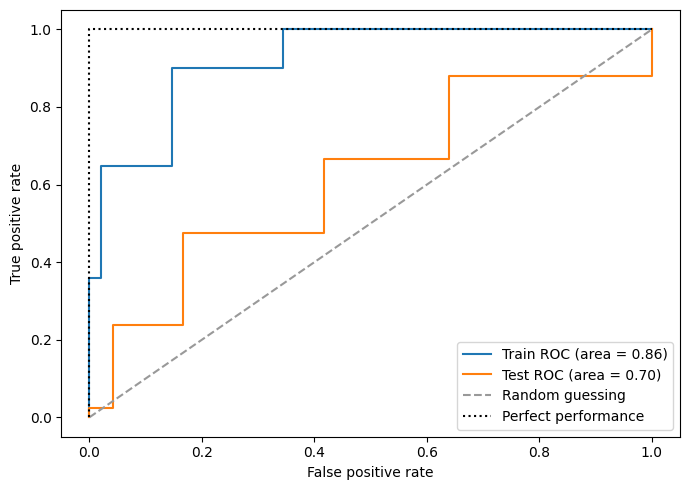

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline 
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
import numpy as np


# smaller training set to make the curve more interesting
X_train2 = X_train[:, [4, 14]]

pipe_knn = make_pipeline(StandardScaler(),
                         KNeighborsClassifier())


fig = plt.figure(figsize=(7, 5))


#############################################################
### TRAINING ROC CURVE
train_probas = pipe_knn.fit(X_train2,
                            y_train).predict_proba(X_train2)

# take only probabilities from class 1
# compute fpr and tpr for different thresholds
fpr, tpr, thresholds = roc_curve(y_train,
                                 train_probas[:, 1],

                                 pos_label=1)
# print(thresholds,fpr,tpr)

roc_auc = auc(fpr, tpr)

plt.step(fpr,
         tpr,
         label='Train ROC (area = %0.2f)'
               % (roc_auc))
#############################################################


#############################################################
### TEST ROC CURVE
test_probas = pipe_knn.predict_proba(X_test[:, [4, 14]])

# take only probabilities from class 1
fpr, tpr, thresholds = roc_curve(y_test,
                                 test_probas[:, 1],
                                 pos_label=1)
# print(thresholds,fpr,tpr)

roc_auc = auc(fpr, tpr)

plt.step(fpr,
         tpr,
         where='post',
         label='Test ROC (area = %0.2f)'
               % (roc_auc))
#############################################################

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

<p style="margin-bottom:1cm;"></p>

### EXERCISE

We have already seen this graph in class. What does it tell you with respect to overfitting and underfitting?

Now let's use ROC for k-fold cross validation.


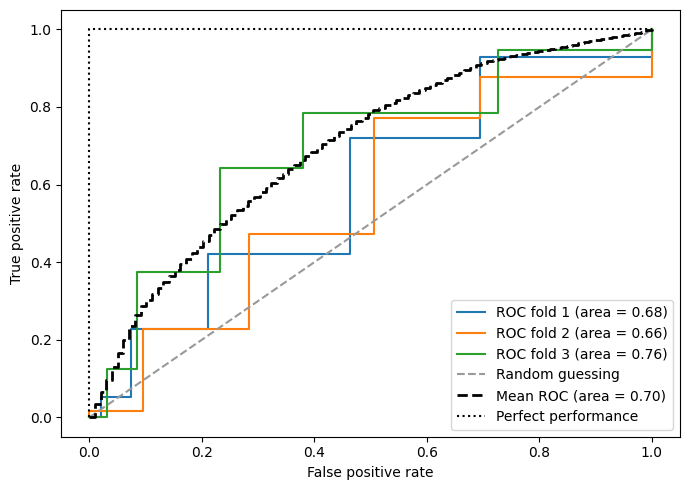

In [46]:
from sklearn.model_selection import StratifiedKFold


pipe_knn = make_pipeline(StandardScaler(),
                         KNeighborsClassifier())

X_train2 = X_train[:, [4, 14]]
    

cv = list(StratifiedKFold(n_splits=3, 
                          shuffle=True,
                          random_state=1).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_knn.fit(X_train2[train],
                          y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.step(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc), where='post')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.step(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2, where='post')
plt.step([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance', where='post')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

Let's do the same study for logistic regression.

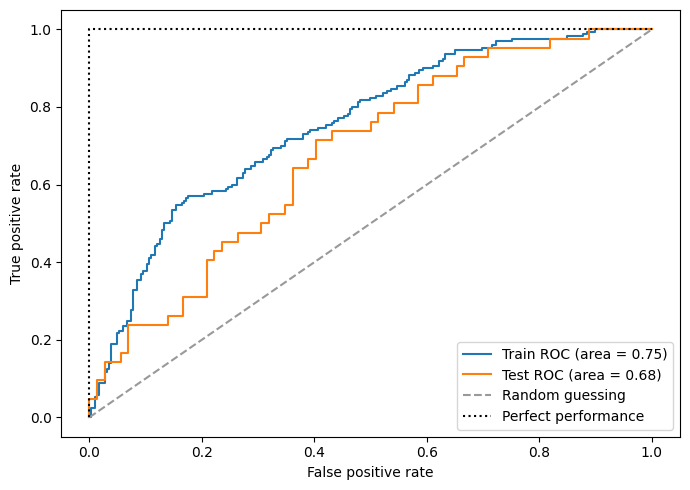

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# smaller training set to make the curve more interesting
X_train2 = X_train[:, [4, 8]]

# Build pipeline with Logistic Regression
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression())

fig = plt.figure(figsize=(7, 5))

#############################################################
### TRAINING ROC CURVE
train_probas = pipe_lr.fit(X_train2,
                           y_train).predict_proba(X_train2)

fpr, tpr, thresholds = roc_curve(y_train,
                                 train_probas[:, 1],
                                 pos_label=1)
roc_auc = auc(fpr, tpr)

plt.step(fpr,
         tpr,
         label='Train ROC (area = %0.2f)' % roc_auc)
#############################################################

#############################################################
### TEST ROC CURVE
test_probas = pipe_lr.predict_proba(X_test[:, [4, 8]])

fpr, tpr, thresholds = roc_curve(y_test,
                                 test_probas[:, 1],
                                 pos_label=1)
roc_auc = auc(fpr, tpr)

plt.step(fpr,
         tpr,
         where='post',
         label='Test ROC (area = %0.2f)' % roc_auc)
#############################################################

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


<p style="margin-bottom:1cm;"></p>

### EXERCISE

What does this graph tell you with respect to overfitting and underfitting? Compare it with the graph above for the KNN classifier.


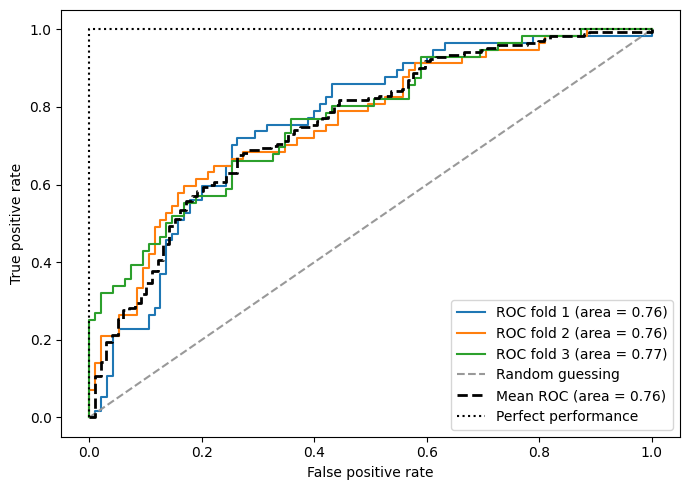

In [19]:
from sklearn.model_selection import StratifiedKFold


pipe_knn = make_pipeline(StandardScaler(),
                         LogisticRegression())

X_train2 = X_train[:, [4, 14]]
    

cv = list(StratifiedKFold(n_splits=3, 
                          shuffle=True,
                          random_state=1).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_knn.fit(X_train2[train],
                          y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.step(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc), where='post')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.step(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2, where='post')
plt.step([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance', where='post')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

<p style="margin-bottom:1cm;"></p>

### EXERCISE

**At this point, based on your ROC analysis, which classifier would you select: the logistic regression classifier or the KNN classifier?**